# Part 3.1
Instead of keeping the word embeddings fixed, now update the word embeddings (the same
way as model parameters) during the training process

In [1]:
from datasets import load_dataset
from utils.rnn_model import *
from utils.rnn_utils import *
from utils.utils import *
from dotenv import load_dotenv
import os

load_dotenv()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Data Preparation

In [2]:
BATCH_SIZE = 32
LR = 0.0001
MODEL_TYPE = "rnn"

In [3]:
dataset = load_dataset("rotten_tomatoes")
trn_dataset = dataset["train"]
val_dataset = dataset["validation"]
tst_dataset = dataset["test"]

In [4]:
sentences = trn_dataset["text"]
words = []

for i in range(len(sentences)):
    sentences[i] = simple_preprocess(sentences[i])

for sentence in sentences:
    for word in sentence:
        if word not in words:
            words.append(word)

word2vec_model1 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")
word2vec_model2 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")
word2vec_model3 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")
word2vec_model4 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")
word2vec_model5 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")
word2vec_model6 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")

In [5]:
word_index = {
    word: i for i, word in enumerate(
        word2vec_model1.index_to_key
    )
}

In [6]:
trn_sentences, trn_labels = prepare_data(
    trn_dataset["text"],
    trn_dataset["label"],
    word_index=word_index
)
val_sentences, val_labels = prepare_data(
    val_dataset["text"],
    val_dataset["label"],
    word_index=word_index
)
tst_sentences, tst_labels = prepare_data(
    tst_dataset["text"],
    tst_dataset["label"],
    word_index=word_index
)

In [7]:
trn_dataloader = create_dataloader(
    trn_sentences,
    trn_labels,
    BATCH_SIZE,
    shuffle=True)
val_dataloader = create_dataloader(
    val_sentences,
    val_labels,
    BATCH_SIZE,
    shuffle=False)
tst_dataloader = create_dataloader(
    tst_sentences,
    tst_labels,
    BATCH_SIZE,
    shuffle=False)

# Models

## Last State Model

In [8]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model1.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
    pooling_method="last_state"
)

In [9]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="last_state"
)

Epoch   1/100, Loss: 0.6963, Accuracy: 0.5141
Model saved.
Epoch   2/100, Loss: 0.6899, Accuracy: 0.4972
Epoch   3/100, Loss: 0.6822, Accuracy: 0.5084
Epoch   4/100, Loss: 0.6516, Accuracy: 0.6069
Model saved.
Epoch   5/100, Loss: 0.5323, Accuracy: 0.6998
Model saved.
Epoch   6/100, Loss: 0.3792, Accuracy: 0.7083
Model saved.
Epoch   7/100, Loss: 0.2639, Accuracy: 0.7073
Epoch   8/100, Loss: 0.1869, Accuracy: 0.6998
Epoch   9/100, Loss: 0.1329, Accuracy: 0.7026
Epoch  10/100, Loss: 0.0901, Accuracy: 0.6970
Epoch  11/100, Loss: 0.0625, Accuracy: 0.6932
Epoch  12/100, Loss: 0.0415, Accuracy: 0.6998
Epoch  13/100, Loss: 0.0267, Accuracy: 0.7064
Epoch  14/100, Loss: 0.0185, Accuracy: 0.7036
Epoch  15/100, Loss: 0.0146, Accuracy: 0.6961
Epoch  16/100, Loss: 0.0144, Accuracy: 0.6942
Early stopping triggered after 16 epochs.
Training ended, loading best model...
Model loaded.


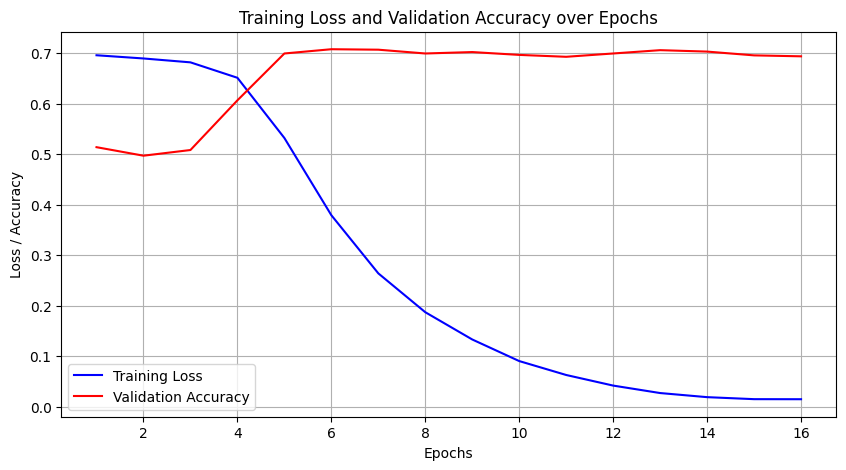

In [10]:
plot_loss_accuracy(losses, accuracies)

In [11]:
last_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7158


## Mean Pool Model

In [12]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model2.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
    pooling_method="mean_pool"
)

In [13]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="mean_pool"
)

Epoch   1/100, Loss: 0.6915, Accuracy: 0.5450
Model saved.
Epoch   2/100, Loss: 0.6609, Accuracy: 0.6445
Model saved.
Epoch   3/100, Loss: 0.5449, Accuracy: 0.6839
Model saved.
Epoch   4/100, Loss: 0.4338, Accuracy: 0.6867
Model saved.
Epoch   5/100, Loss: 0.3476, Accuracy: 0.6914
Model saved.
Epoch   6/100, Loss: 0.2833, Accuracy: 0.7045
Model saved.
Epoch   7/100, Loss: 0.2272, Accuracy: 0.7026
Epoch   8/100, Loss: 0.1834, Accuracy: 0.6904
Epoch   9/100, Loss: 0.1557, Accuracy: 0.6876
Epoch  10/100, Loss: 0.1301, Accuracy: 0.6876
Epoch  11/100, Loss: 0.1120, Accuracy: 0.6942
Epoch  12/100, Loss: 0.0929, Accuracy: 0.6979
Epoch  13/100, Loss: 0.0781, Accuracy: 0.6923
Epoch  14/100, Loss: 0.0692, Accuracy: 0.6970
Epoch  15/100, Loss: 0.0581, Accuracy: 0.6970
Epoch  16/100, Loss: 0.0477, Accuracy: 0.6829
Early stopping triggered after 16 epochs.
Training ended, loading best model...
Model loaded.


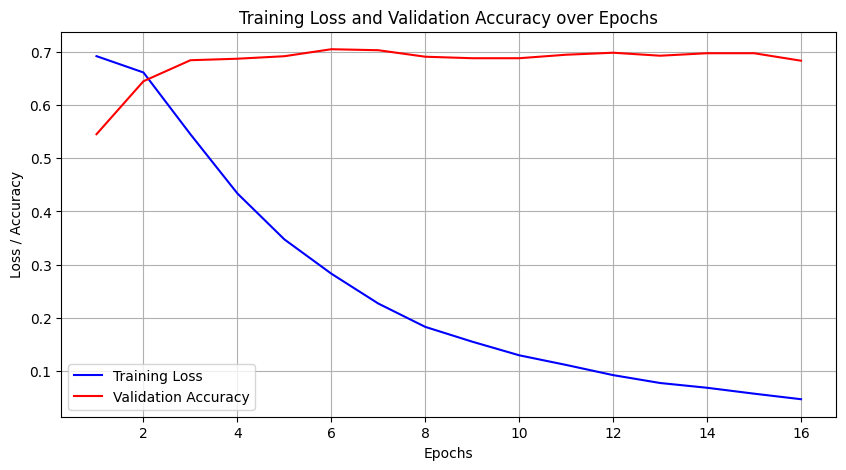

In [14]:
plot_loss_accuracy(losses, accuracies)

In [15]:
mean_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7073


## Max Pool Model

In [16]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model3.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
    pooling_method="max_pool"
)

In [17]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="max_pool"
)

Epoch   1/100, Loss: 0.6934, Accuracy: 0.5769
Model saved.
Epoch   2/100, Loss: 0.6815, Accuracy: 0.5994
Model saved.
Epoch   3/100, Loss: 0.6660, Accuracy: 0.6154
Model saved.
Epoch   4/100, Loss: 0.6350, Accuracy: 0.6510
Model saved.
Epoch   5/100, Loss: 0.5448, Accuracy: 0.6801
Model saved.
Epoch   6/100, Loss: 0.4476, Accuracy: 0.6848
Model saved.
Epoch   7/100, Loss: 0.3698, Accuracy: 0.6989
Model saved.
Epoch   8/100, Loss: 0.3040, Accuracy: 0.7054
Model saved.
Epoch   9/100, Loss: 0.2489, Accuracy: 0.6998
Epoch  10/100, Loss: 0.2038, Accuracy: 0.7111
Model saved.
Epoch  11/100, Loss: 0.1752, Accuracy: 0.7064
Epoch  12/100, Loss: 0.1507, Accuracy: 0.7036
Epoch  13/100, Loss: 0.1319, Accuracy: 0.7026
Epoch  14/100, Loss: 0.1146, Accuracy: 0.6998
Epoch  15/100, Loss: 0.0983, Accuracy: 0.6951
Epoch  16/100, Loss: 0.0913, Accuracy: 0.6923
Epoch  17/100, Loss: 0.0803, Accuracy: 0.6886
Epoch  18/100, Loss: 0.0718, Accuracy: 0.6932
Epoch  19/100, Loss: 0.0645, Accuracy: 0.6811
Epoch  20

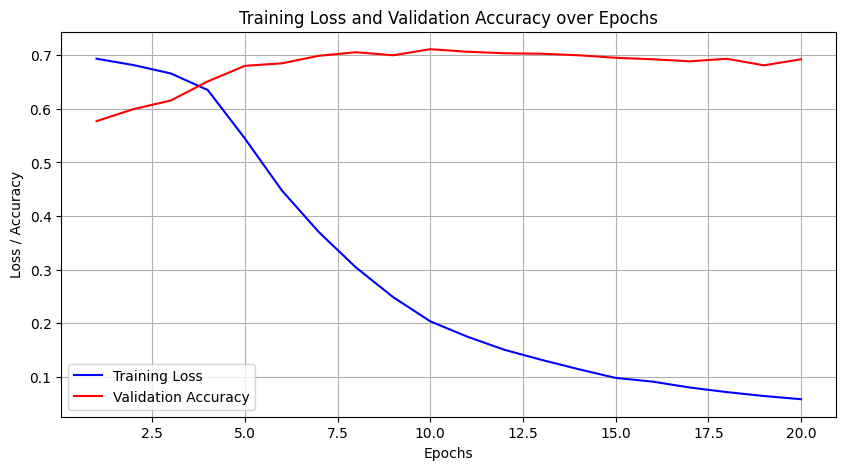

In [18]:
plot_loss_accuracy(losses, accuracies)

In [19]:
max_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7251


## Mean Max Pool Model

In [20]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model4.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
    pooling_method="mean_max"
)

In [21]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="mean_max"
)

Epoch   1/100, Loss: 0.6931, Accuracy: 0.5591
Model saved.
Epoch   2/100, Loss: 0.6782, Accuracy: 0.5779
Model saved.
Epoch   3/100, Loss: 0.6101, Accuracy: 0.6445
Model saved.
Epoch   4/100, Loss: 0.4965, Accuracy: 0.6829
Model saved.
Epoch   5/100, Loss: 0.4037, Accuracy: 0.7008
Model saved.
Epoch   6/100, Loss: 0.3278, Accuracy: 0.6989
Epoch   7/100, Loss: 0.2634, Accuracy: 0.6998
Epoch   8/100, Loss: 0.2118, Accuracy: 0.6942
Epoch   9/100, Loss: 0.1821, Accuracy: 0.6876
Epoch  10/100, Loss: 0.1518, Accuracy: 0.6923
Epoch  11/100, Loss: 0.1284, Accuracy: 0.6876
Epoch  12/100, Loss: 0.1076, Accuracy: 0.6895
Epoch  13/100, Loss: 0.0953, Accuracy: 0.6895
Epoch  14/100, Loss: 0.0807, Accuracy: 0.6839
Epoch  15/100, Loss: 0.0661, Accuracy: 0.6764
Early stopping triggered after 15 epochs.
Training ended, loading best model...
Model loaded.


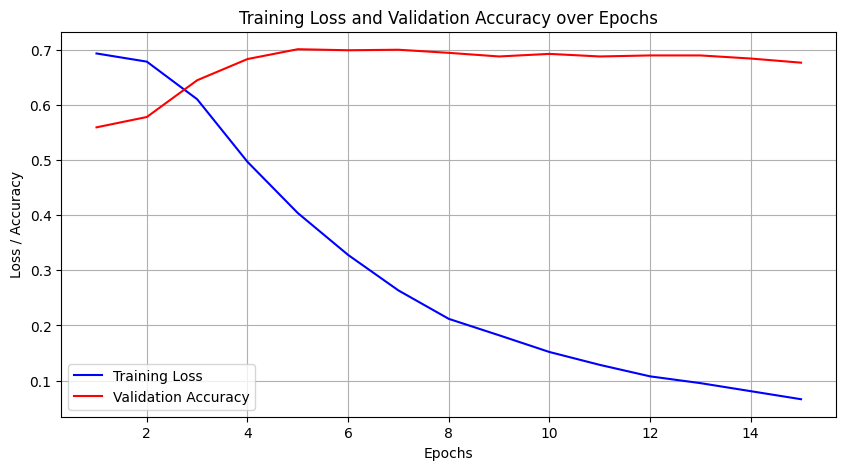

In [22]:
plot_loss_accuracy(losses, accuracies)

In [23]:
mean_max_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7448


## Attention Model

In [24]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model5.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
    pooling_method="attention"
)

In [25]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="attention"
)

Epoch   1/100, Loss: 0.6924, Accuracy: 0.5600
Model saved.
Epoch   2/100, Loss: 0.6623, Accuracy: 0.6360
Model saved.
Epoch   3/100, Loss: 0.5472, Accuracy: 0.6923
Model saved.
Epoch   4/100, Loss: 0.4353, Accuracy: 0.7195
Model saved.
Epoch   5/100, Loss: 0.3513, Accuracy: 0.7054
Epoch   6/100, Loss: 0.2864, Accuracy: 0.7073
Epoch   7/100, Loss: 0.2312, Accuracy: 0.7176
Epoch   8/100, Loss: 0.1911, Accuracy: 0.6979
Epoch   9/100, Loss: 0.1549, Accuracy: 0.6932
Epoch  10/100, Loss: 0.1304, Accuracy: 0.7111
Epoch  11/100, Loss: 0.1075, Accuracy: 0.7026
Epoch  12/100, Loss: 0.0891, Accuracy: 0.7101
Epoch  13/100, Loss: 0.0802, Accuracy: 0.6998
Epoch  14/100, Loss: 0.0681, Accuracy: 0.6979
Early stopping triggered after 14 epochs.
Training ended, loading best model...
Model loaded.


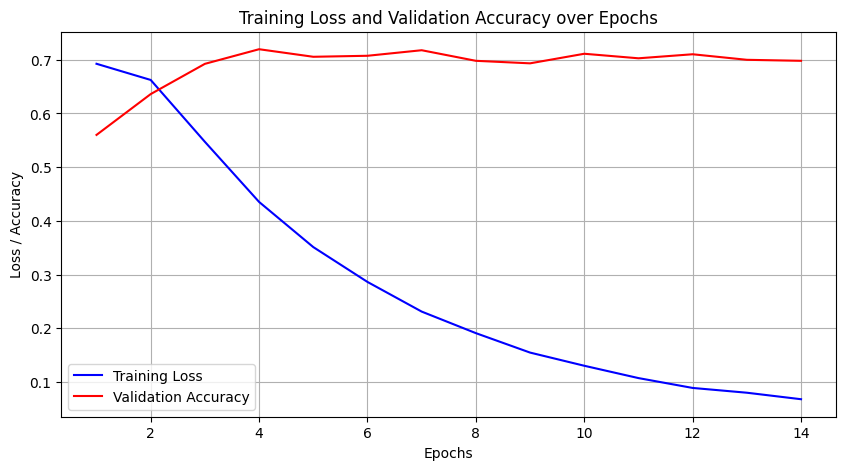

In [26]:
plot_loss_accuracy(losses, accuracies)

In [27]:
attn_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7083


# Results

In [28]:
print(f"Last State Test Accuracy:       {last_tst_accuracy:.4f}")
print(f"Mean Pool Test Accuracy:        {mean_tst_accuracy:.4f}")
print(f"Max Pool Test Accuracy:         {max_tst_accuracy:.4f}")
print(f"Mean Max Pool Test Accuracy:    {mean_max_tst_accuracy:.4f}")
print(f"Attention Test Accuracy:        {attn_tst_accuracy:.4f}")

Last State Test Accuracy:       0.7158
Mean Pool Test Accuracy:        0.7073
Max Pool Test Accuracy:         0.7251
Mean Max Pool Test Accuracy:    0.7448
Attention Test Accuracy:        0.7083


From the above results, it is evident that training the word embeddings results in a much higher accuracy compared to not training word embeddings.

| Method | Part 2 Test Accuracy | Part 3.1 Test Accuracy |
| --- | --- | --- |
| Last State | 0.5844 | 0.7158 |
| Mean Pooling | 0.6201 | 0.7073 |
| Max Pooling | 0.6670 | 0.7251 |
| Mean Max Pooling | 0.6370 | 0.7448 |
| Attention Mask | 0.6248 | 0.7083 |